## Omdena Chapter: Algeria
### Green Algeria Project Building an Intelligent Control System for greenhouses


<b> <h4> Dataset: <a href="https://www.kaggle.com/datasets/piantic/autonomous-greenhouse-challengeagc-2nd-2019">  Autonomous Greenhouse Challenge(AGC) 2019~2020 - 2nd Edition </a> </h4> </b>
<br>

Content : 
<br>
<table style="width:70%">
    <tr>
        <th style="width:30%"> File Name </th>
        <th style="width:70%"> Description </th>
    </tr>
    <tr>
        <td> Weather + Greenhouse-Climate </td>
        <td> outdoor and indoor greenhouse climate, irrigation, status of actuators,<br> requested and realized climate setpoints </td>
    </tr>
    <tr>
        <td> Resource </td>
        <td> Resource Consumption </td>
    </tr>
    <tr>
        <td> Production </td>
        <td> Harvest </td>
    </tr>
    <tr>
        <td> Crop-Production </td>
        <td> Crop-related parameters </td>
    </tr>
    <tr>
        <td> TomQuality </td>
        <td> Tomato Quality </td>
    </tr>
    <tr>
        <td> <b> LabAnalysis </b> </td>
        <td> <b> Analysis of irrigation and drain samples </b> </td>
    </tr>
    <tr>
        <td> Grodan-Sens </td>
        <td> Root-zone/slab information </td>
    </tr>
</table>


In [1]:
# This file covers the harvest analysis Greenhouse
# The weather & internal climates are covered in separate file

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
path = ("../Dataset")
os.listdir(path)

['AICU',
 'Automatoes',
 'Digilog',
 'Economics.pdf',
 'IUACAAS',
 'ReadMe.pdf',
 'Reference',
 'TheAutomators',
 'Weather']

In [4]:
files = ['AICU', 'Automatoes', 'Digilog', 'IUACAAS', 'Reference', 'TheAutomators']

## Lab Analysis

In [5]:
df = {}
for file in files:
    df[file] = pd.read_csv("../Dataset/"+file+"/LabAnalysis.csv")

In [6]:
for i in df:
    print(i,"\n",df[i].head(),"\n")
    

AICU 
    %Time  irr_PH  irr_EC  irr_NH4  irr_K  irr_Na  irr_Ca  irr_Mg  irr_Si  \
0  43836     5.3     4.3      1.1   15.2     0.3     9.6     4.9    0.09   
1  43850     5.2     4.0      1.1   11.3     0.3     9.8     4.1    0.09   
2  43864     4.8     3.9      1.3   11.6     0.3    10.2     3.5    0.09   
3  43879     4.8     3.7      1.4   13.3     0.4     8.2     2.8    0.09   
4  43893     4.7     3.5      1.1   11.3     0.4     7.6     2.5    0.01   

   irr_NO3  ...  drain_Cl  drain_SO4  drain_HCO3  drain_PO4  drain_Fe  \
0     21.7  ...       7.6       13.5         1.4       2.00      27.8   
1     21.0  ...      10.0       23.4         1.3       0.42      21.1   
2     18.6  ...      12.0       17.5         1.0       1.30      18.3   
3     16.0  ...      20.0       13.2         0.1       6.10      24.4   
4     14.1  ...      21.2       11.6         0.1       9.32      31.0   

   drain_Mn  drain_Zn  drain_B  drain_Cu  drain_Mo  
0       7.7       5.7     49.0       0.9    

In [14]:
for i in df:
    df[i]['%Time'] = pd.to_datetime(df[i]['%Time'], unit='d',origin='1899-12-30')


In [15]:
col = df['AICU'].columns
col = col[1:]

In [16]:
#as the given data is in time-series format therefor interpolating the data with nearest member to remove null values

for i in df:
    for j in col:
        df[i][j] = df[i][j].astype(str).astype(float)

for i in df:
    df[i] = df[i].fillna(df[i].mean())  
  

C:\Users\vivek\AppData\Local\Temp\ipykernel_20716\2623652833.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[i] = df[i].fillna(df[i].mean())


In [17]:
for i in df:
    print(i,"\n",df[i].head(),"\n")

AICU 
        %Time  irr_PH  irr_EC  irr_NH4  irr_K  irr_Na  irr_Ca  irr_Mg  irr_Si  \
0 2020-01-06     5.3     4.3      1.1   15.2     0.3     9.6     4.9    0.09   
1 2020-01-20     5.2     4.0      1.1   11.3     0.3     9.8     4.1    0.09   
2 2020-02-03     4.8     3.9      1.3   11.6     0.3    10.2     3.5    0.09   
3 2020-02-18     4.8     3.7      1.4   13.3     0.4     8.2     2.8    0.09   
4 2020-03-03     4.7     3.5      1.1   11.3     0.4     7.6     2.5    0.01   

   irr_NO3  ...  drain_Cl  drain_SO4  drain_HCO3  drain_PO4  drain_Fe  \
0     21.7  ...       7.6       13.5         1.4       2.00      27.8   
1     21.0  ...      10.0       23.4         1.3       0.42      21.1   
2     18.6  ...      12.0       17.5         1.0       1.30      18.3   
3     16.0  ...      20.0       13.2         0.1       6.10      24.4   
4     14.1  ...      21.2       11.6         0.1       9.32      31.0   

   drain_Mn  drain_Zn  drain_B  drain_Cu  drain_Mo  
0       7.7       5.

C:\Users\vivek\AppData\Local\Temp\ipykernel_20716\103642182.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)


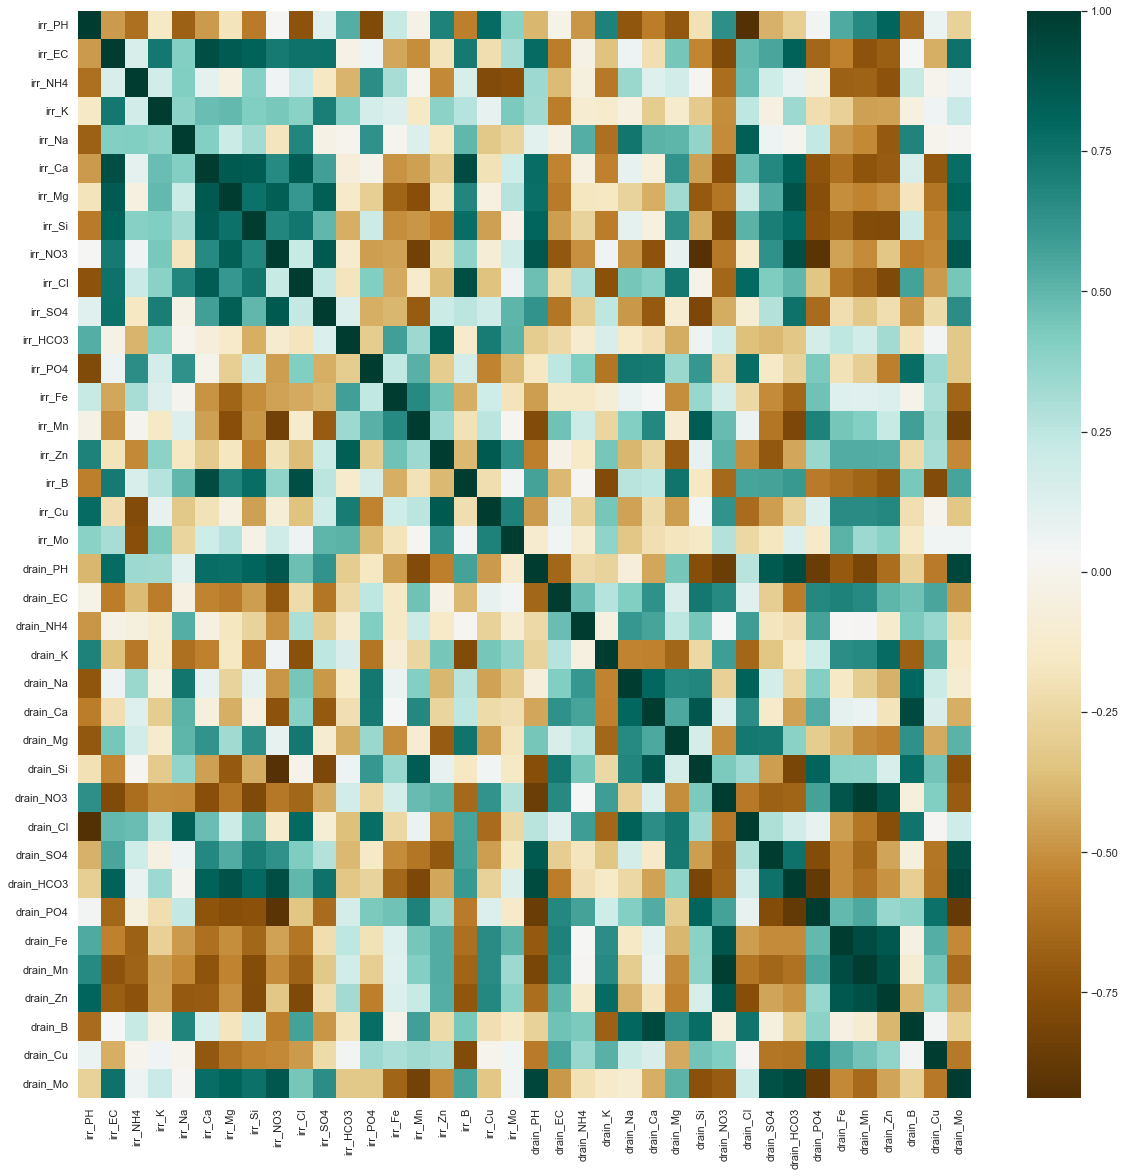

In [18]:
from pandas.plotting import scatter_matrix
df_corr = df['AICU'].corr()

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

In [47]:
def plot(target):
    
    k=0
    sns.set()
    plt.figure(figsize=(20, 400),facecolor='lightgray')

    for j in col:
        plt.subplot(38, 1, k + 1)
        for i in df:
            plt.plot(df[i][target], df[i][j])
        plt.legend(files)
        plt.title("{var} vs {target}".format(var=j,target=target))
        plt.xlabel(j)
        plt.ylabel(target)
        k=k+1
    plt.show()
        
    

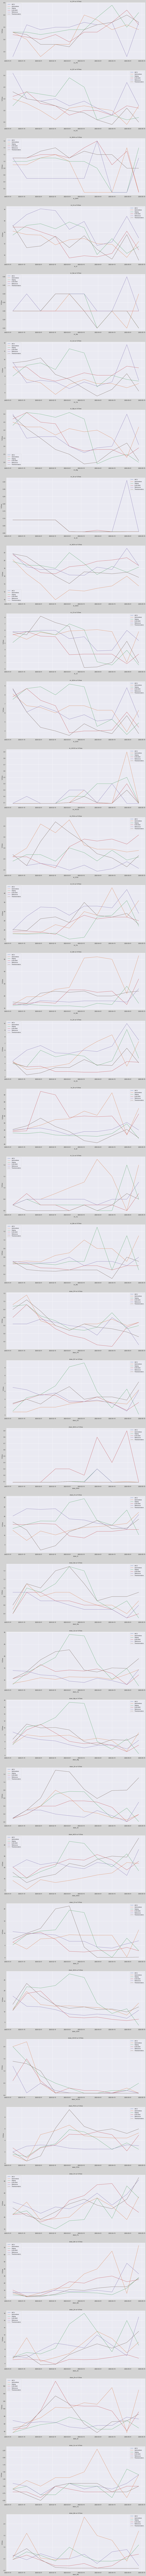

In [48]:
plot('%Time')